# Ford GoBike System Data
## by Zyad Alatar


## brief description:
In this project I will perform an analysis and visualize Ford GoBike dataset.This dataset is basically about bikes that is shared in public where members can use it.The dataset conations many information form spatial data to members infromation and much more.

## Preliminary Wrangling



In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [22]:
#The csv file is stored locally in the same path as ipynb file
df = pd.read_csv('201902-fordgobike-tripdata.csv');
#confirming
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [23]:
df.shape

(183412, 16)

In [24]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [25]:
#as we see here there are many rows with null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [27]:
#Now we have removed all rows that birth of year on it is null
df=df[df['member_birth_year'].isnull() == False]

#now we have removed all rows that doesn't have start station name
df=df[df['start_station_name'].isnull() == False]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

Now The data doesn't contain null values.

In [39]:
#changing the data type of start and end time to be datetime
df.start_time=pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

In [40]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,139.002126,37.771220,-122.351760,136.604486,37.771414,-122.351335,4482.587555,1984.803135
std,1642.204905,111.648819,0.100391,0.117732,111.335635,0.100295,0.117294,1659.195937,10.118731
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,323.000000,47.000000,37.770407,-122.411901,44.000000,37.770407,-122.411647,3799.000000,1980.000000
50%,510.000000,104.000000,37.780760,-122.398279,101.000000,37.781010,-122.397437,4960.000000,1987.000000
75%,789.000000,239.000000,37.797320,-122.283093,238.000000,37.797673,-122.286533,5505.000000,1992.000000
max,84548.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [41]:
df.shape

(174952, 16)

### What is the structure of your dataset?
The dataset contains 174952 rows with 16 columns.There many different date type of columns but mostly float.

### What is/are the main feature(s) of interest in your dataset?
the realationship between duration and distance with gender

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
 I believe that user_type, gender, age(from brith yaer ) and the spatial data (distance)will have my interest more than any other attribute.

## Univariate Exploration


### Gender Distribution

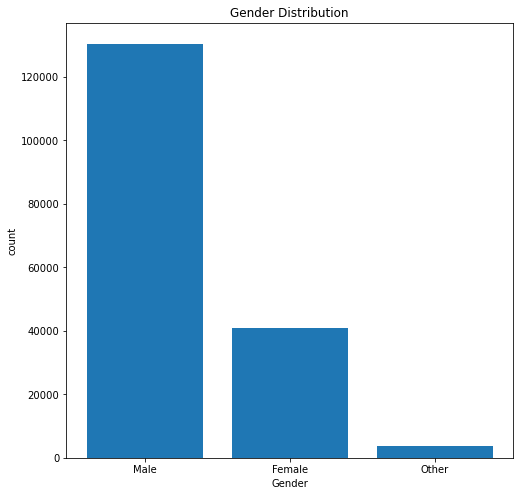

In [111]:
#First of all we will show gender distribution
plt.figure(figsize=[8,8])
plt.bar(x = df.member_gender.value_counts().keys(), height = df.member_gender.value_counts() )
plt.xlabel('Gender')
plt.ylabel('count')
plt.title('Gender Distribution')
plt;

it is clear that there is huge difference between Male users to Female, as obvious Male are more with around 130000 users

### Users Distribution

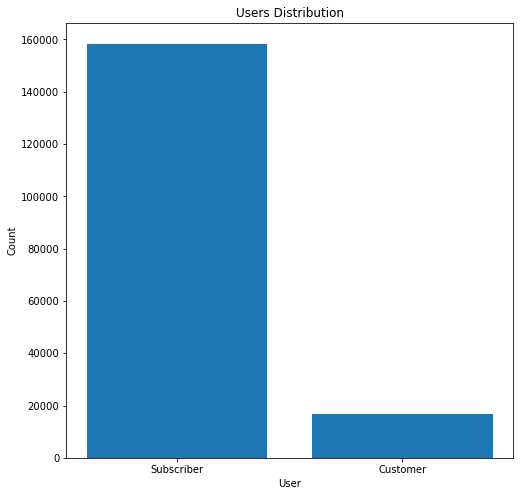

In [112]:
#then I will show type of users Customer / Subscriber
plt.figure(figsize=[8,8])
plt.bar(x = df.user_type.value_counts().keys(), height = df.user_type.value_counts())
plt.title('Users Distribution')
plt.xlabel('User')
plt.ylabel('Count')
plt;

it is clear that there is huge difference between Subscriber users to Customer, as obvious Male are more with around 160000 users

### Distance occurence

In [113]:
#now i will calculate the distance using the spatial data that we have in our dataset
#I refered to stackOverFlow to get a function that calculate the distance based on latitude&longitude
#https://stackoverflow.com/questions/19412462/getting-distance-between-two-points-based-on-latitude-longitude
from math import sin, cos, sqrt, atan2, radians

def distance (lat1,lon1,lat2,lon2):
    R = 6373.0
    
    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return np.float64(round(1000*distance))

In [114]:
#Now we will add new colume that conations the distance
#note that the distance here im meters
df['distance'] = df.apply(lambda row: distance(row['start_station_latitude'],row['start_station_longitude'],row['end_station_latitude'],row['end_station_longitude']),axis=1)
#confirming
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,distance
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,545.0
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,2705.0
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,261.0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,2410.0
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,3333.0


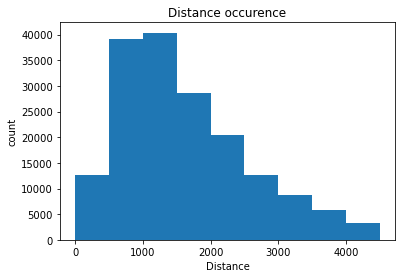

In [115]:
plt.hist(data = df, x ='distance', bins = np.arange(0, (2133+ 1.5*1247)+500, 500));
plt.title('Distance occurence')
plt.xlabel('Distance')
plt.ylabel('count')
plt;

from the histogram its obvious the range between 500 to 1500 meters are the most highest traveled distance

### Duration distribution

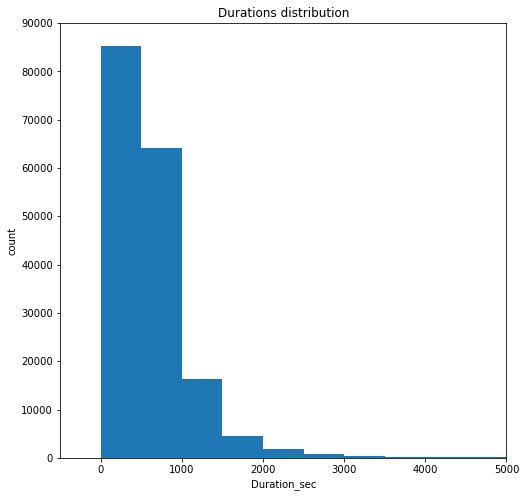

In [116]:
plt.figure(figsize=[8, 8])
plt.hist(data = df, x = 'duration_sec', bins = np.arange(0, df['duration_sec'].max()+500, 500))
plt.title('Duration distribution')
plt.xlabel('Duration_sec')
plt.ylabel('count')

plt.axis([-500, 5000, 0, 90000])
plt;

From the histogram we can say that most of the trips are between 1 second to 1000 seconds to make more understandable most trip are form 1 second to 16 minutes 

### Distribution of age with number of trips

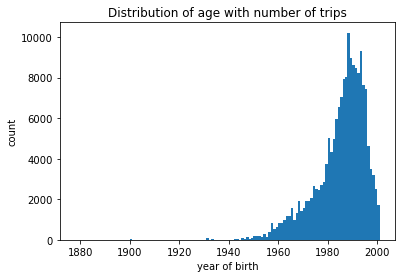

In [117]:
plt.hist(data = df, x ='member_birth_year', bins =  np.arange(df['member_birth_year'].min(), df['member_birth_year'].max()+1, 1));
plt.title('Distribution of age with number of trips')
plt.xlabel('year of birth')
plt.ylabel('count')
plt;

To make clear I will make it starts from 1930 since we don't have date before this yaer

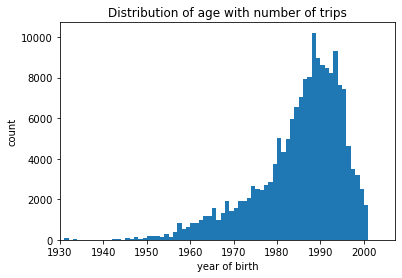

In [118]:
plt.hist(data = df, x ='member_birth_year', bins =  np.arange(df['member_birth_year'].min(), df['member_birth_year'].max()+1, 1));
plt.title('Distribution of age with number of trips')
plt.xlabel('year of birth')
plt.ylabel('count')
plt.xlim(1930)
plt;

We can see that the years around 1990 got the highest occurence

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
I have to limt the x axis to q3 + 1.5 * iqr because of an outlines in histogram of distance occurence

### Of the features you investigated, were there any unusual distributions?Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

There weren't any unusual feature.I have calculated the distance from spatial data the we have to know the distance of trips

## Bivariate Exploration


In [119]:
#to avoid outliers in distance q3+1.5 iqr to filter them
#iqr=q3-q1
 
q3=df["distance"].quantile(0.75)
q1=df["distance"].quantile(0.25)
#confirming
iqr =q3-q1;
print(q1)
print(q3)
print(iqr)


911.0
2225.0
1314.0


In [120]:
q1- 1.5*iqr

-1060.0

### violin of distance and gender relationship

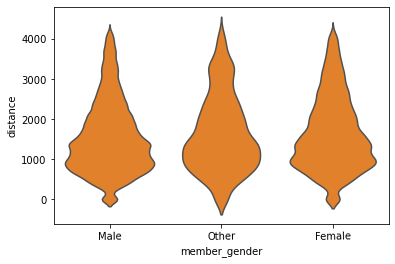

In [121]:
sb.violinplot(data = df.query("distance <= 2225+ 1.5*1314"),x = 'member_gender',y='distance',color = sb.color_palette()[1],inner=None);
plt.xticks(rotation=1);

From the graph we can see that from 0-900m males have more occurence where females are close but less than males
others are traveling longer distance more than other types.

In [122]:
#to avoid outliers in distance q3+1.5 iqr to filter them
#iqr=q3-q1
 
q3=df["duration_sec"].quantile(0.95)
q1=df["duration_sec"].quantile(0.25)
#confirming
iqr =q3-q1;
fun=q3+1.5*iqr
print(q1)
print(q3)
print(iqr)
print(fun)

323.0
1531.0
1208.0
3343.0


### violin of duration and gender relationship

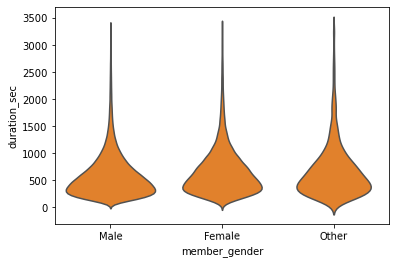

In [123]:
sb.violinplot(data = df.query("duration_sec <= 3343.0"),x = 'member_gender',y='duration_sec',color = sb.color_palette()[1],inner=None);
plt.xticks(rotation=1);

Male tripes are moslty around 400 sec where others spent the longer duration.females are in the middle of other types but mostly less than 400 sec

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Males prefer shot distance trips with short duration
Females prefer short distance trips with shot duration
Others seems like that they like long distance trips with longer duration

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

No

## Multivariate Exploration
In this section i will try to use three variables in investigating the relationship between duration, age, and gender

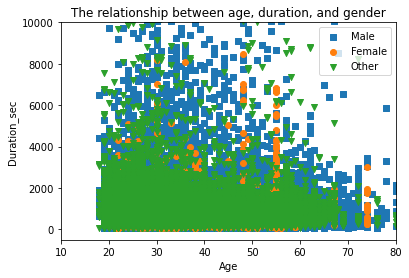

In [127]:
#creating symbol for each category of gender
symbols = [['Male', 's'],['Other', 'o'],['Female', 'v']]

for gender, symbol in symbols:
    #creating data frame of genders
    df_genders = df[df['member_gender'] == gender]
    #plotting scatter plot for gender with duration and age
    plt.scatter((2019 - df_genders['member_birth_year']), df_genders['duration_sec'], marker = symbol, alpha= 1)
plt.legend(['Male','Female','Other'])
plt.axis([10, 80, -500, 10000 ])
plt.title('The relationship between age, duration, and gender')
plt.xlabel('Age')
plt.ylabel('Duration_sec')
plt;

This graph is not clear and you can't understand anything from it so the next step now is to separate them into three graphs

C:\Users\Ziad\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


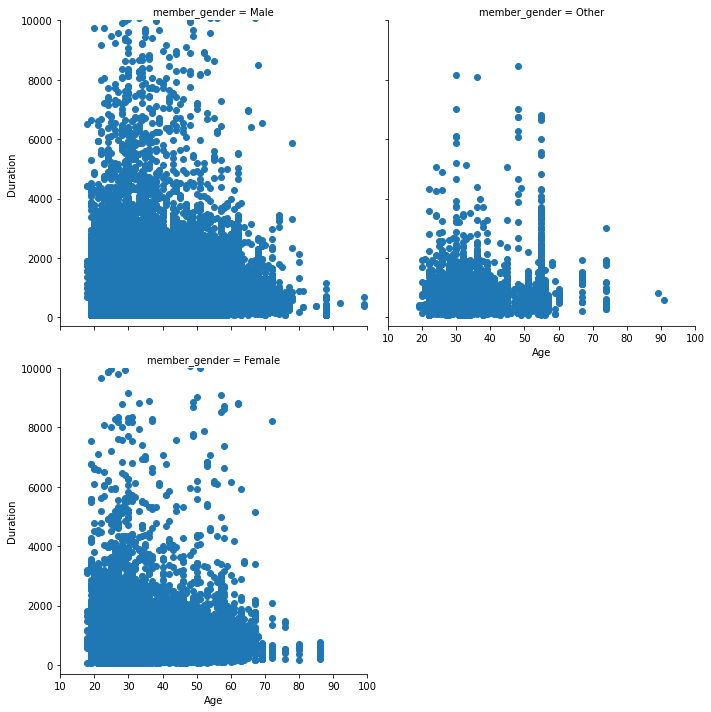

In [139]:
df['Age'] = (2019 - df['member_birth_year'])
gender = sb.FacetGrid(data = df, col = 'member_gender', col_wrap = 2, size = 5, xlim = [10, 100], ylim = [-300, 10000])
gender.map(plt.scatter, 'Age', 'duration_sec', alpha= 1)
gender.set_ylabels('Duration')
gender.set_xlabels('Age')

plt;

Now we can explore the relationship between age and gender and duration as easy as possible.We can see that Male with age between 20 and 60 have shown a high occurence in spending  lower than 3000 sec duration where females with the same range of age have shown high occurence in spending lower than 2000 sec duration


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

I observed that age and duration have a strong relationship .I can say that male with age lower than 50 seems like they have higher occurence than female and other genders. 

### Were there any interesting or surprising interactions between features?
I'm surprising that alot of people and especially male and female with age higher than 50 can spend long duration 